In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#AE4532", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [18]:
import requests
import io

url = 'https://raw.githubusercontent.com/ahmedsameh909/Health-Care-Project/main/Data_Heart_clean.csv'
response = requests.get(url)
Data = pd.read_csv(io.StringIO(response.text))

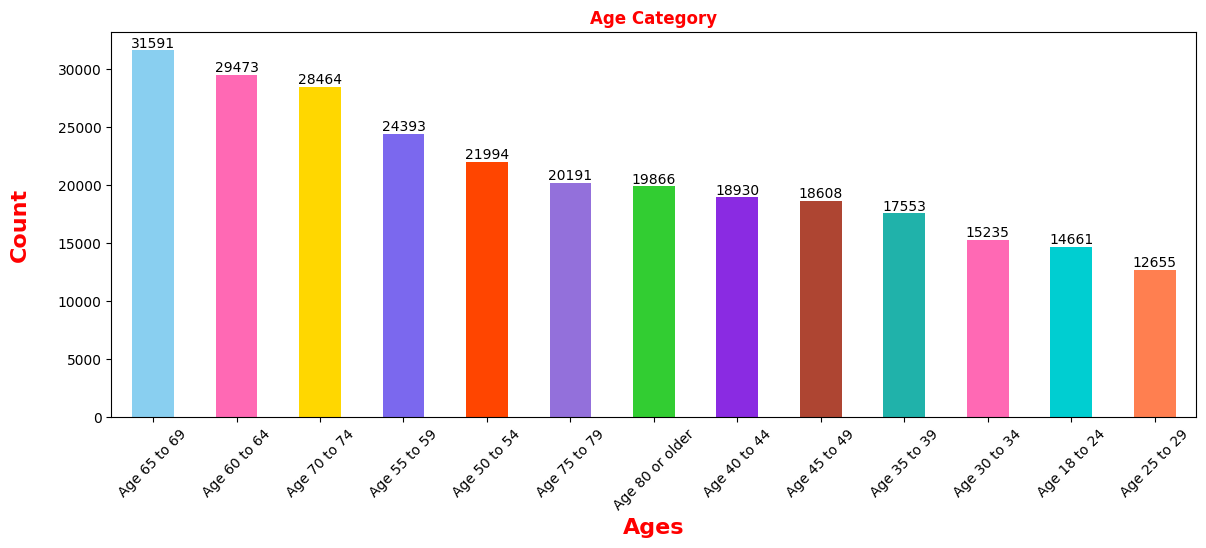

In [19]:
plt.figure(figsize=(14,5))
Age=Data['AgeCategory'].value_counts().plot(kind='bar',color=colors[:len(colors)],rot=45)
for p in Age.patches :
    Age.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+2), ha='center' , va='bottom',color='black')
plt.title("Age Category",color='red',weight='bold')
plt.xlabel('Ages',color='red',weight='bold',fontsize=16)
plt.ylabel('Count',color='red',weight='bold',fontsize=16,labelpad = 20)
plt.show()

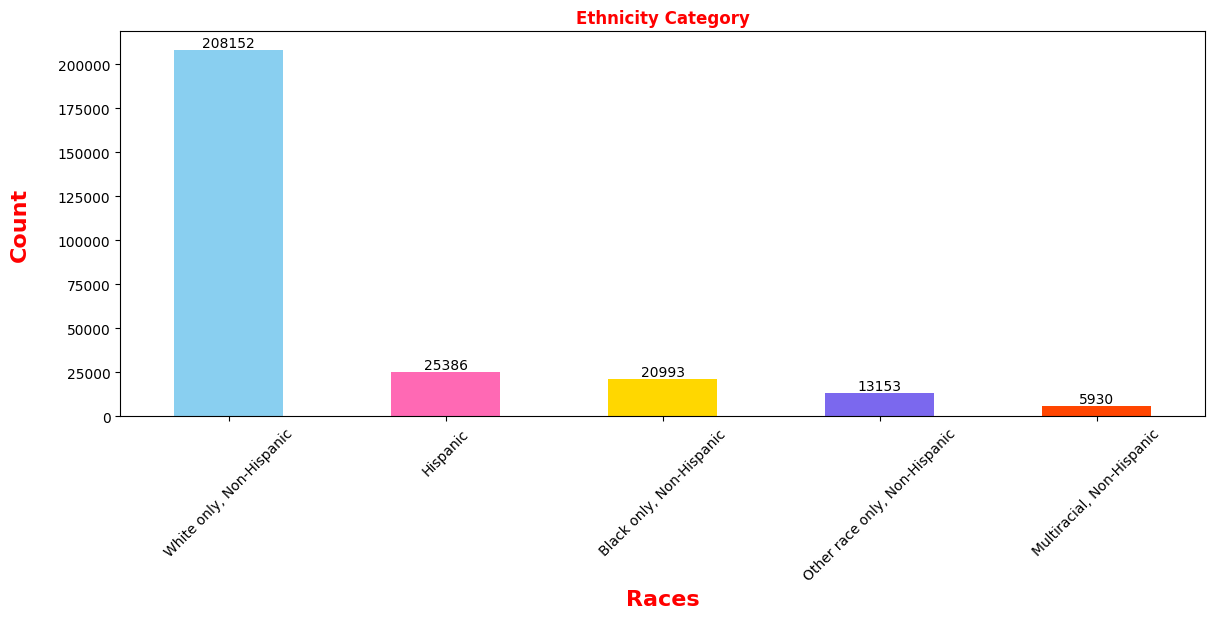

In [20]:
plt.figure(figsize=(14,5))
race=Data['RaceEthnicityCategory'].value_counts().plot(kind='bar',color=colors[:len(colors)],rot=45)
for p in race.patches :
    race.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+2), ha='center' , va='bottom',color='black')
plt.title("Ethnicity Category",color='red',weight='bold')
plt.xlabel('Races',color='red',weight='bold',fontsize=16)
plt.ylabel('Count',color='red',weight='bold',fontsize=16,labelpad = 20)
plt.show()

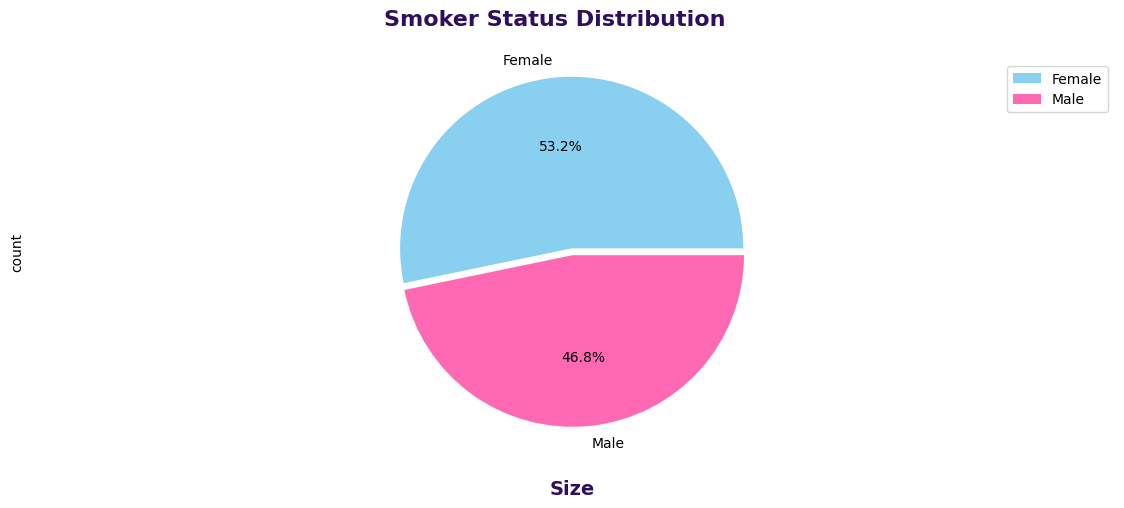

In [21]:
plt.figure(figsize=(14,5))
explode=(0,0.04)
counts=Data['Sex'].value_counts()
counts.plot(kind='pie',autopct='%1.1f%%',explode=explode,colors=colors)
plt.suptitle("Smoker Status Distribution", fontsize=16, fontweight='bold', color='#2F0F5D')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 25)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

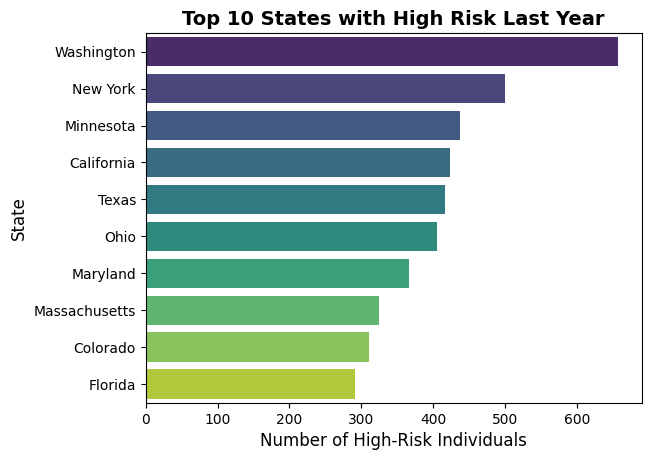

In [22]:
High_Risk_LastYear_State = Data[Data['HighRiskLastYear'] == 1 ]['State']
top_states = High_Risk_LastYear_State.value_counts().head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title('Top 10 States with High Risk Last Year', fontsize=14, weight='bold')
plt.xlabel('Number of High-Risk Individuals', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

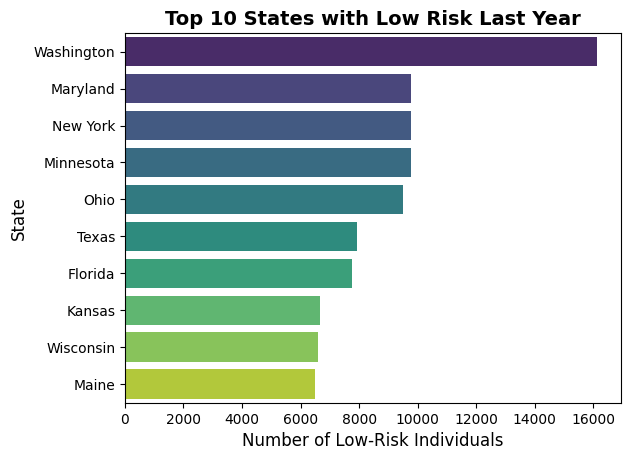

In [23]:
Low_Risk_LastYear_State=Data[Data['HighRiskLastYear'] == 0]['State']
low_states=Low_Risk_LastYear_State.value_counts().head(10)
sns.barplot(x=low_states.values,y=low_states.index,palette='viridis')
plt.title('Top 10 States with Low Risk Last Year', fontsize=14, weight='bold')
plt.xlabel('Number of Low-Risk Individuals', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()

In [24]:
Physical_Activities = Data['PhysicalActivities'].value_counts()
fig = px.bar(
    x=Physical_Activities.index,
    y=Physical_Activities.values,
    labels={'x': 'Physical Activities', 'y': 'Count'},
    title='<b>Physical Activities</b>',
    color=Physical_Activities.index,
    color_discrete_sequence=['#3498db', '#e74c3c'])
fig.show()

In [25]:
fig = px.box(
    data_frame=Data,
    y='SleepHours',
    log_y=True,
    title="<b>Box Plot for Sleep Hours</b>" )
fig.show()

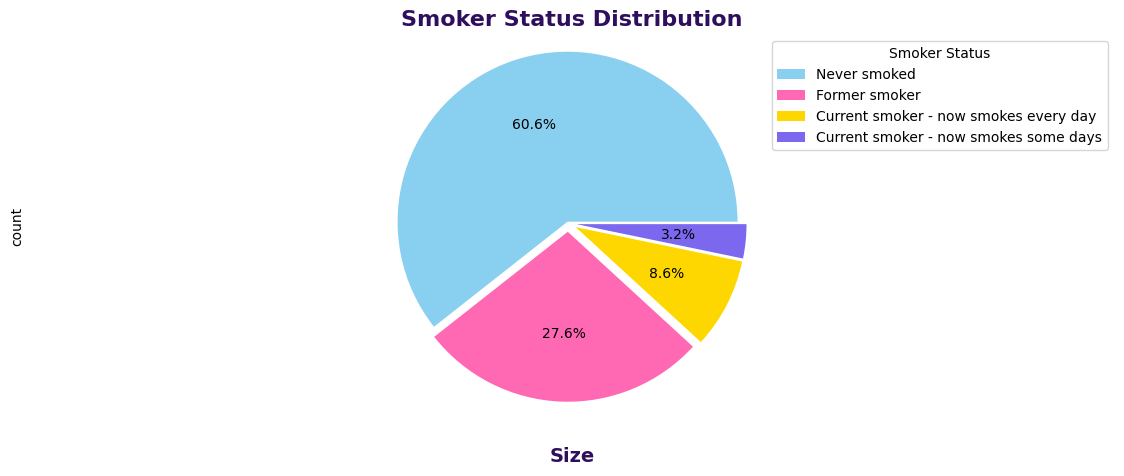

In [26]:
plt.figure(figsize=(14,5))
smoker=Data['SmokerStatus'].value_counts()
explode=(0.01,0.05,0.05,0.05)
smoker.plot(kind='pie',colors=colors[:len(colors)],explode=explode,autopct='%1.1f%%',labels=None)
plt.title("Smoker Status Distribution", fontsize=16, fontweight='bold', color='#2F0F5D')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels=smoker.index,title='Smoker Status')
plt.axis('equal')
plt.show()

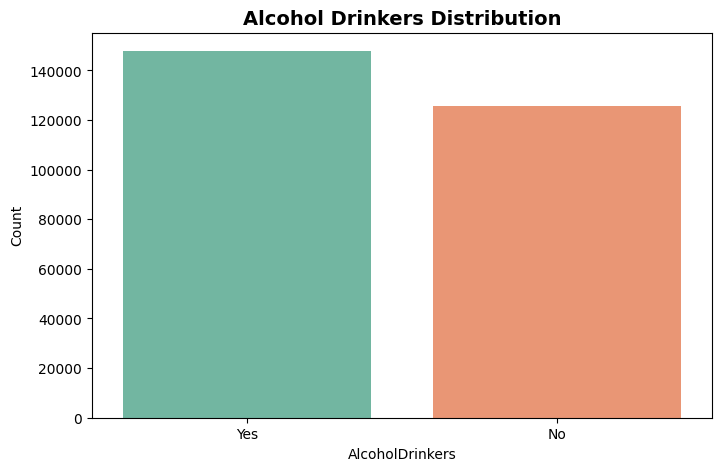

In [27]:
Alcohol = Data['AlcoholDrinkers'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=Alcohol.index, y=Alcohol.values, palette='Set2')
plt.title('Alcohol Drinkers Distribution', fontsize=14, fontweight='bold')
plt.xlabel('AlcoholDrinkers')
plt.ylabel('Count')
plt.show()

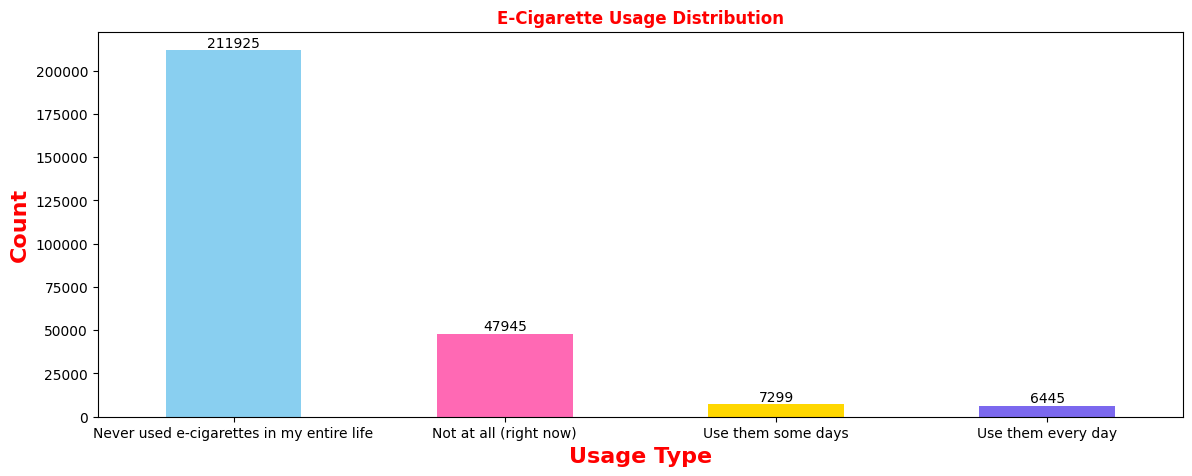

In [28]:
plt.figure(figsize=(14,5))
E_cigarette=Data['ECigaretteUsage'].value_counts().plot(kind='bar',color=colors[:len(colors)],rot=0)
for p in E_cigarette.patches:
    E_cigarette.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+2), ha ='center', va ='bottom')
plt.title("E-Cigarette Usage Distribution",color='red',weight='bold')
plt.xlabel('Usage Type',color='red',weight='bold',fontsize=16)
plt.ylabel('Count',color='red',weight='bold',fontsize=16)
plt.show()